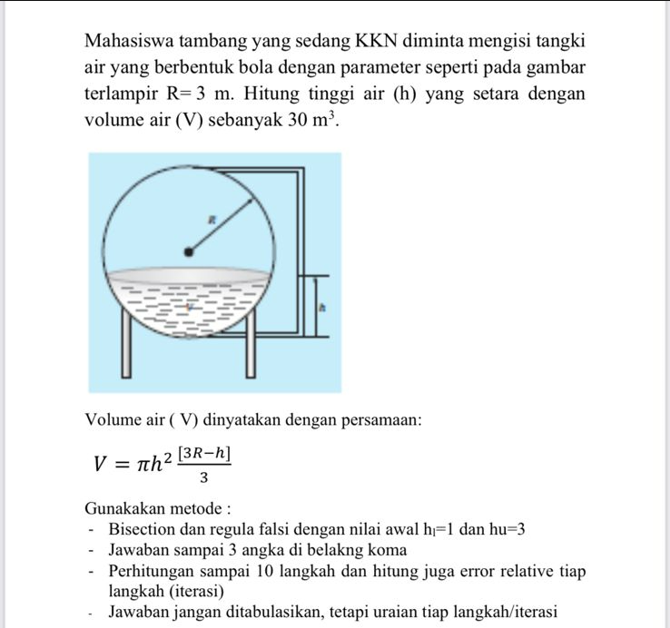

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def function(r, h):
  return (np.pi * (h ** 2) * ((3*r - h) / 3))

In [5]:
# BISECTION
xl, xu = 1, 3
iteration = 10
r = 3
target = 30 # target

data = {
    # 'iteration' : list(),
    'xl'        : list(),
    'xu'        : list(),
    'xm'        : list(),
    '|%error|'   : list(),
    'lower'     : list(),
    'upper'     : list(),
    'F(xm)'     : list()
}

data_bisection = data

def insert_data(xl, xu, xm, ea, lower, upper, fxm):
  # data['iteration'].append(i)
  data['xl'].append(xl)
  data['xu'].append(xu)
  data['xm'].append(xm)
  data['|%error|'].append(ea)
  data['lower'].append(lower)
  data['upper'].append(upper)
  data['F(xm)'].append(fxm)

# print("i | xl | xu | xm | Ea% | f(xm)")
for i in range(iteration):
  if i == 0:
    lower = function(r, xl)
    upper = function(r, xu)
    xm = (xl + xu) / 2
    xm_old = xm
    fxm = function(r, xm)
    # print(i + 1, xl, xu, xm, "-", end=" ")
    # print(fxm)
    ea = "-"
    insert_data(xl, xu, xm, ea, lower, upper, fxm)
  elif i > 0:
    if fxm < upper and fxm > target:
      xu = xm
    elif fxm > lower and fxm < target:
      xl = xm
    else:
      break
    lower = function(r, xl)
    upper = function(r, xu)
    xm_old = xm
    xm = (xl + xu) / 2
    # print(xm, xm_old)
    ea = (xm - xm_old) / xm * 100
    fxm = function(r, xm)
    # print(i + 1, xl, xu, xm, abs(ea), fxm)
    insert_data(xl, xu, xm, abs(ea), lower, upper, fxm)

df_bisection = pd.DataFrame(data_bisection)
print(df_bisection)

         xl        xu        xm   |%error|      lower      upper      F(xm)
0  1.000000  3.000000  2.000000          -   8.377580  56.548668  29.321531
1  2.000000  3.000000  2.500000       20.0  29.321531  56.548668  42.542401
2  2.000000  2.500000  2.250000  11.111111  29.321531  42.542401  35.784704
3  2.000000  2.250000  2.125000   5.882353  29.321531  35.784704  32.510166
4  2.000000  2.125000  2.062500   3.030303  29.321531  32.510166  30.904344
5  2.000000  2.062500  2.031250   1.538462  29.321531  30.904344  30.109966
6  2.000000  2.031250  2.015625   0.775194  29.321531  30.109966  29.714994
7  2.015625  2.031250  2.023438     0.3861  29.714994  30.109966  29.912292
8  2.023438  2.031250  2.027344   0.192678  29.912292  30.109966  30.011082
9  2.023438  2.027344  2.025391   0.096432  29.912292  30.011082  29.961676


In [14]:
# Regula Falsi
xl, xu = 1, 3
iteration = 10
r = 3
target = 30 # target

data = {
    # 'iteration' : list(),
    'xl'        : list(),
    'xu'        : list(),
    'xm'        : list(),
    '|%error|'   : list(),
    'lower'     : list(),
    'upper'     : list(),
    'F(xm)'     : list()
}

data_regulafalsi = data

def insert_data(xl, xu, xm, ea, lower, upper, fxm):
  # data['iteration'].append(i)
  data['xl'].append(xl)
  data['xu'].append(xu)
  data['xm'].append(xm)
  data['|%error|'].append(ea)
  data['lower'].append(lower)
  data['upper'].append(upper)
  data['F(xm)'].append(fxm)

# print("i | xl | xu | xm | Ea% | f(xm)")
for i in range(iteration):
  if i == 0:
    lower = function(r, xl)
    upper = function(r, xu)
    if target == 0:
      xm = (xu * lower - xl * upper) / (lower - upper)
    else:
      xm = (xl * upper + xu * lower) / (upper + lower)
    xm_old = xm
    fxm = function(r, xm)
    # print(i + 1, xl, xu, xm, "-", end=" ")
    # print(fxm)
    ea = "-"
    insert_data(xl, xu, xm, ea, lower, upper, fxm)
  elif i > 0:
    if fxm < upper and fxm > target:
      xu = xm
    elif fxm > lower and fxm < target:
      xl = xm
    else:
      break
    lower = function(r, xl)
    upper = function(r, xu)
    xm_old = xm
    if target == 0:
      xm = (xu * lower - xl * upper) / (lower - upper)
    else:
      xm = (xl * upper + xu * lower) / (upper + lower)
    # print(xm, xm_old)
    ea = (xm - xm_old) / xm * 100
    fxm = function(r, xm)
    # print(i + 1, xl, xu, xm, abs(ea), fxm)
    insert_data(xl, xu, xm, abs(ea), lower, upper, fxm)

df_regulafalsi = pd.DataFrame(data_regulafalsi)
print(df_regulafalsi)

         xl        xu        xm   |%error|      lower      upper      F(xm)
0  1.000000  3.000000  1.258065          -   8.377580  56.548668  12.831694
1  1.258065  3.000000  1.580230  20.387271  12.831694  56.548668  19.402596
2  1.580230  3.000000  1.942926   18.66751  19.402596  56.548668  27.897542
3  1.942926  3.000000  2.292140  15.235262  27.897542  56.548668  36.905818
4  1.942926  2.292140  2.093261   9.500904  27.897542  36.905818  31.691914
5  1.942926  2.093261  2.013307   3.971261  27.897542  31.691914  29.656537
6  2.013307  2.093261  2.051958   1.883592  29.656537  31.691914  30.635711
7  2.013307  2.051958  2.032319    0.96634  29.656537  30.635711  30.137038
8  2.013307  2.032319  2.022737   0.473719  29.656537  30.137038  29.894580
9  2.022737  2.032319  2.027508   0.235348  29.894580  30.137038  30.015249


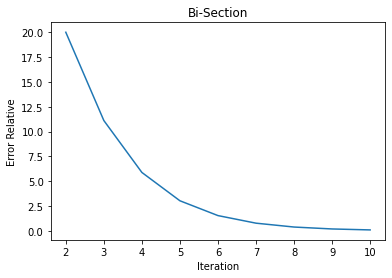

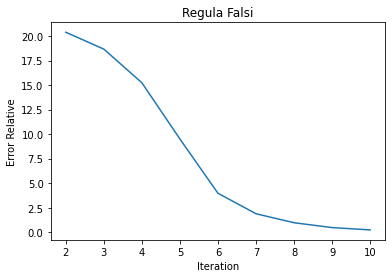

In [15]:
# Plot
plt.plot(np.arange(2, 11), np.array(data_bisection["|%error|"][1:]))
# plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|error|"][1:]))
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.title("Bi-Section")
plt.show()

# plt.plot(np.arange(2, 11), np.array(data_bisection["|error|"][1:]))
plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|%error|"][1:]))
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.title("Regula Falsi")
plt.show()

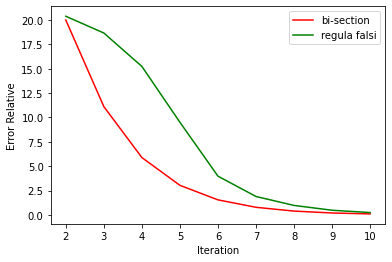

In [16]:
# Plot
plt.plot(np.arange(2, 11), np.array(data_bisection["|%error|"][1:]), color="r", label="bi-section")
plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|%error|"][1:]), color="g", label="regula falsi")
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.legend()
plt.show()